In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from mlxtend.plotting import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, accuracy_score, recall_score, roc_curve, precision_recall_curve, auc
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import warnings

In [111]:
df = pd.read_csv('insurance_claims.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [112]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

Dropping some unnecessary features

In [114]:
data = df.drop(['_c39','policy_bind_date','policy_state','incident_date','incident_state','incident_city','incident_location',
                'insured_hobbies','fraud_reported','umbrella_limit'],axis=1)

#data = df.drop(["_c39","policy_bind_date", "policy_state", "incident_date","umbrella_limit","insured_zip","insured_hobbies","incident_state",
                #"fraud_reported","incident_city", "incident_location", "policy_csl"],axis=1)

data.head()

,months_as_customer,age,policy_number,policy_csl,policy_deductable,policy_annual_premium,insured_zip,insured_sex,insured_education_level,insured_occupation,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,328,48,521585,250/500,1000,1406.91,466132,MALE,MD,craft-repair,...,1,2,YES,71610,6510,13020,52080,Saab,92x,2004
1,228,42,342868,250/500,2000,1197.22,468176,MALE,MD,machine-op-inspct,...,0,0,?,5070,780,780,3510,Mercedes,E400,2007
2,134,29,687698,100/300,2000,1413.14,430632,FEMALE,PhD,sales,...,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007
3,256,41,227811,250/500,2000,1415.74,608117,FEMALE,PhD,armed-forces,...,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014
4,228,44,367455,500/1000,1000,1583.91,610706,MALE,Associate,sales,...,0,1,NO,6500,1300,650,4550,Accura,RSX,2009


### Data cleaning

In [115]:
data.isnull().values.any() 

False

There are no missing values. But some values are unknown and are represented by '?' so we will replace '?' by 'Unknown'.

In [116]:
data = data.replace(['?'],'Unknown')
data.head()

,months_as_customer,age,policy_number,policy_csl,policy_deductable,policy_annual_premium,insured_zip,insured_sex,insured_education_level,insured_occupation,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,328,48,521585,250/500,1000,1406.91,466132,MALE,MD,craft-repair,...,1,2,YES,71610,6510,13020,52080,Saab,92x,2004
1,228,42,342868,250/500,2000,1197.22,468176,MALE,MD,machine-op-inspct,...,0,0,Unknown,5070,780,780,3510,Mercedes,E400,2007
2,134,29,687698,100/300,2000,1413.14,430632,FEMALE,PhD,sales,...,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007
3,256,41,227811,250/500,2000,1415.74,608117,FEMALE,PhD,armed-forces,...,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014
4,228,44,367455,500/1000,1000,1583.91,610706,MALE,Associate,sales,...,0,1,NO,6500,1300,650,4550,Accura,RSX,2009


## Exploratory data analysis

### Exploring categorical data

In [117]:
categorical_predictors = [feature for feature in data.columns if (data[feature].dtypes=='object')]
categorical_predictors

['policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model']

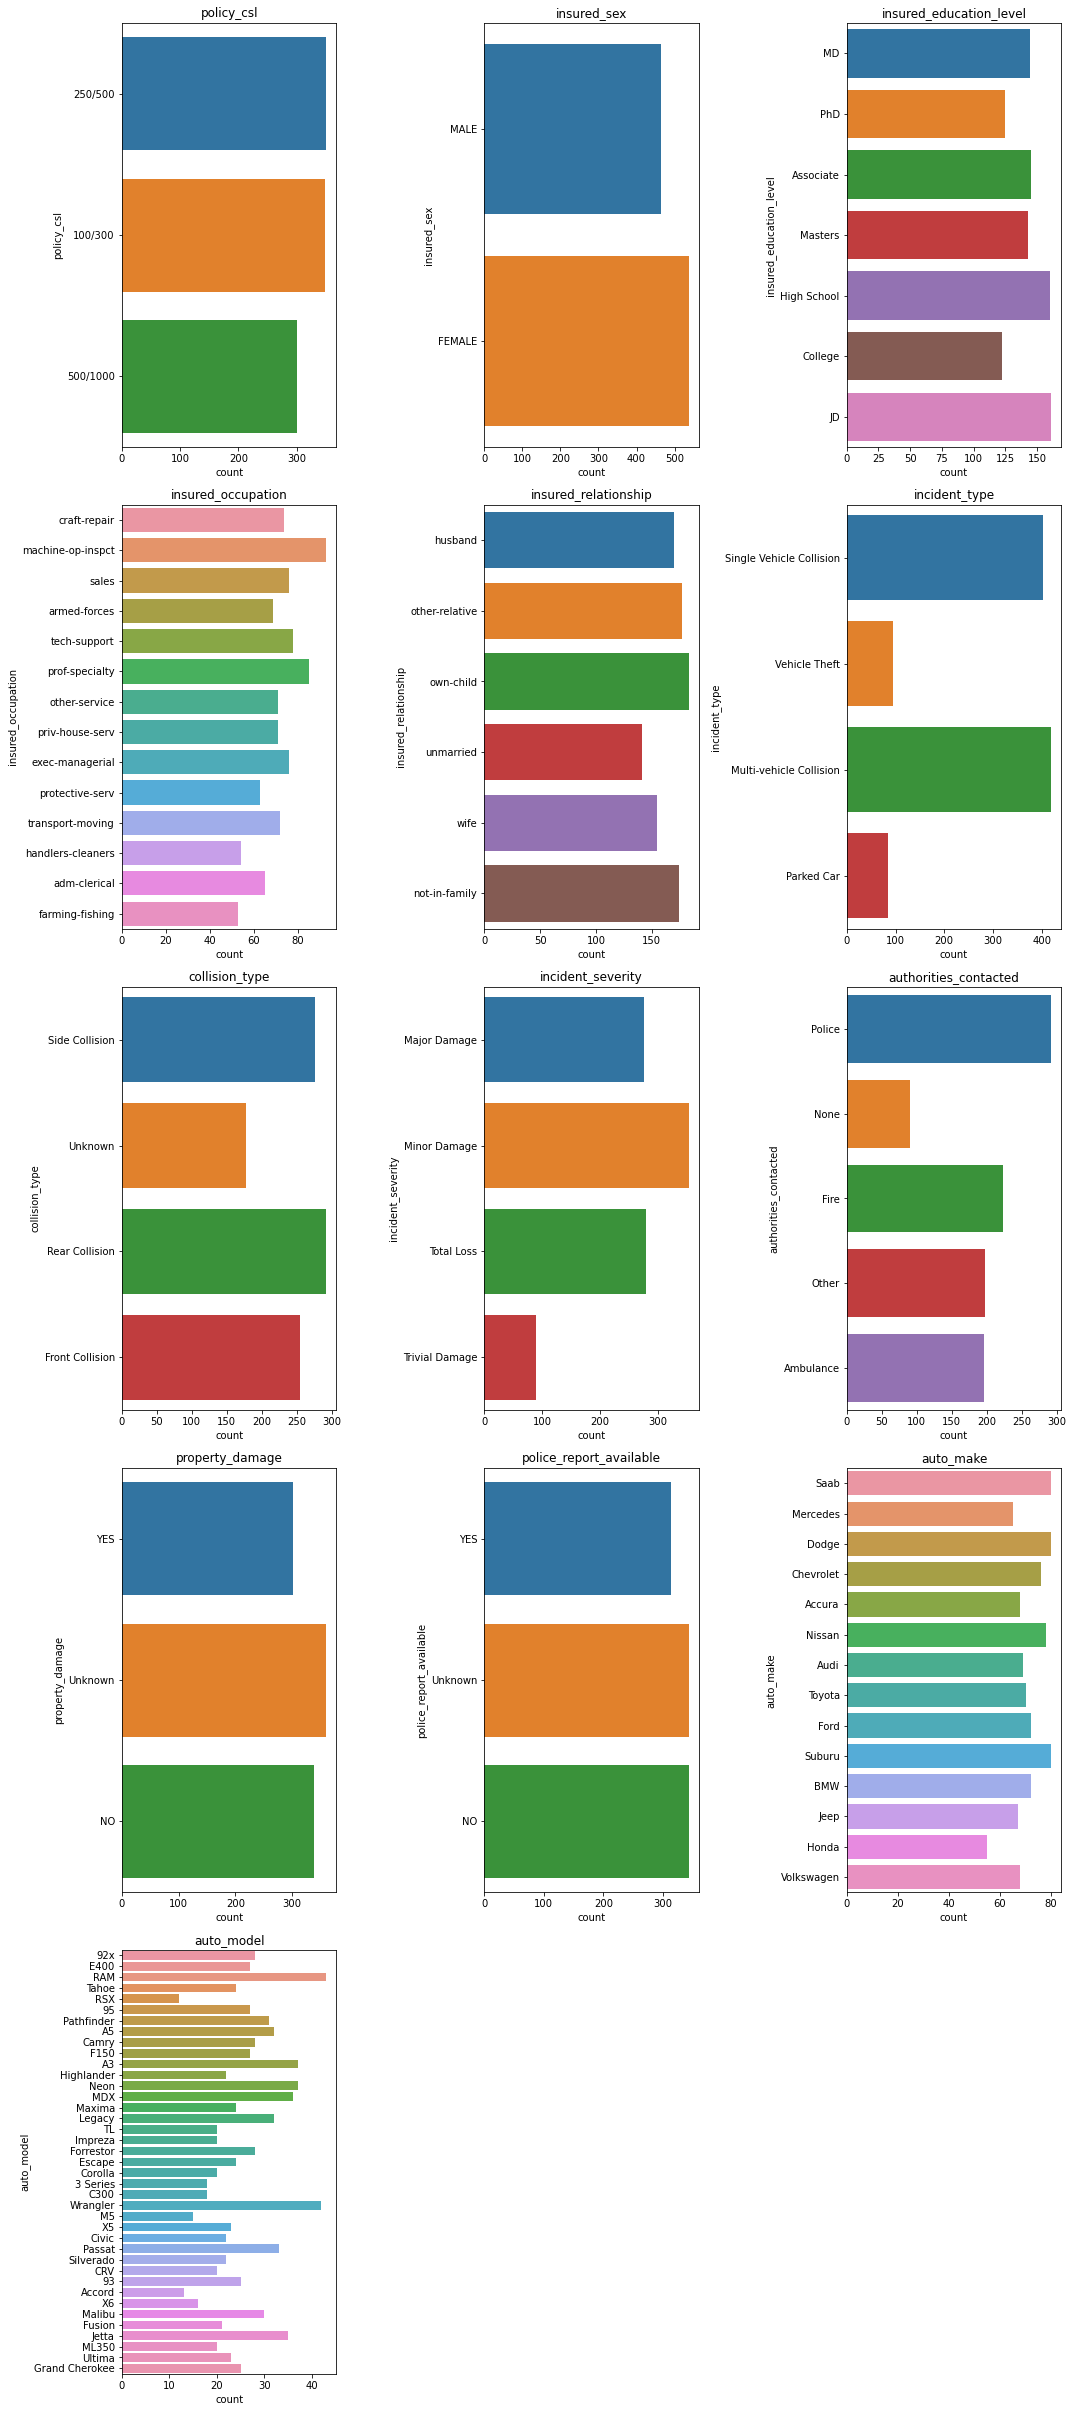

In [118]:
plt.figure(figsize=(15,80))
plotnumber = 1
for categorical_predictor in categorical_predictors:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y = categorical_predictor,data = data)
    plt.title(categorical_predictor)
    plotnumber+=1
plt.tight_layout()
plt.show()

### Relationship between categorical features and labels

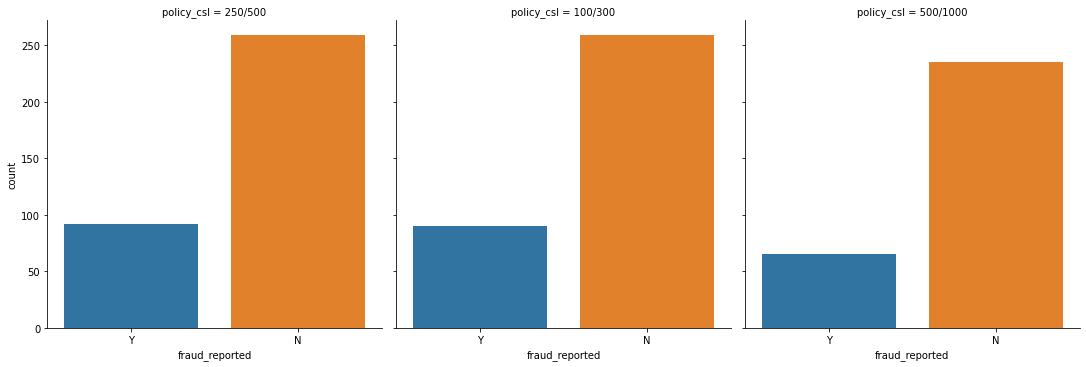

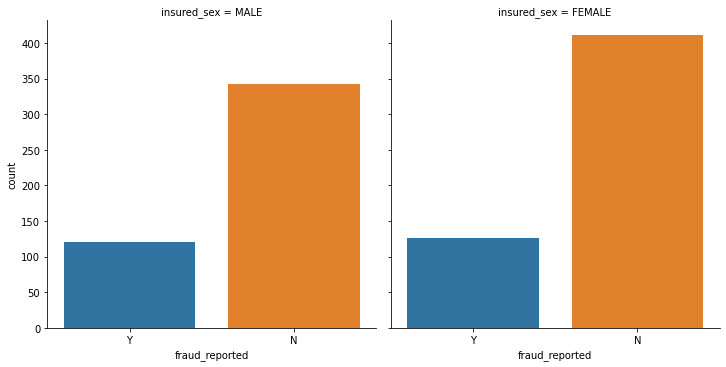

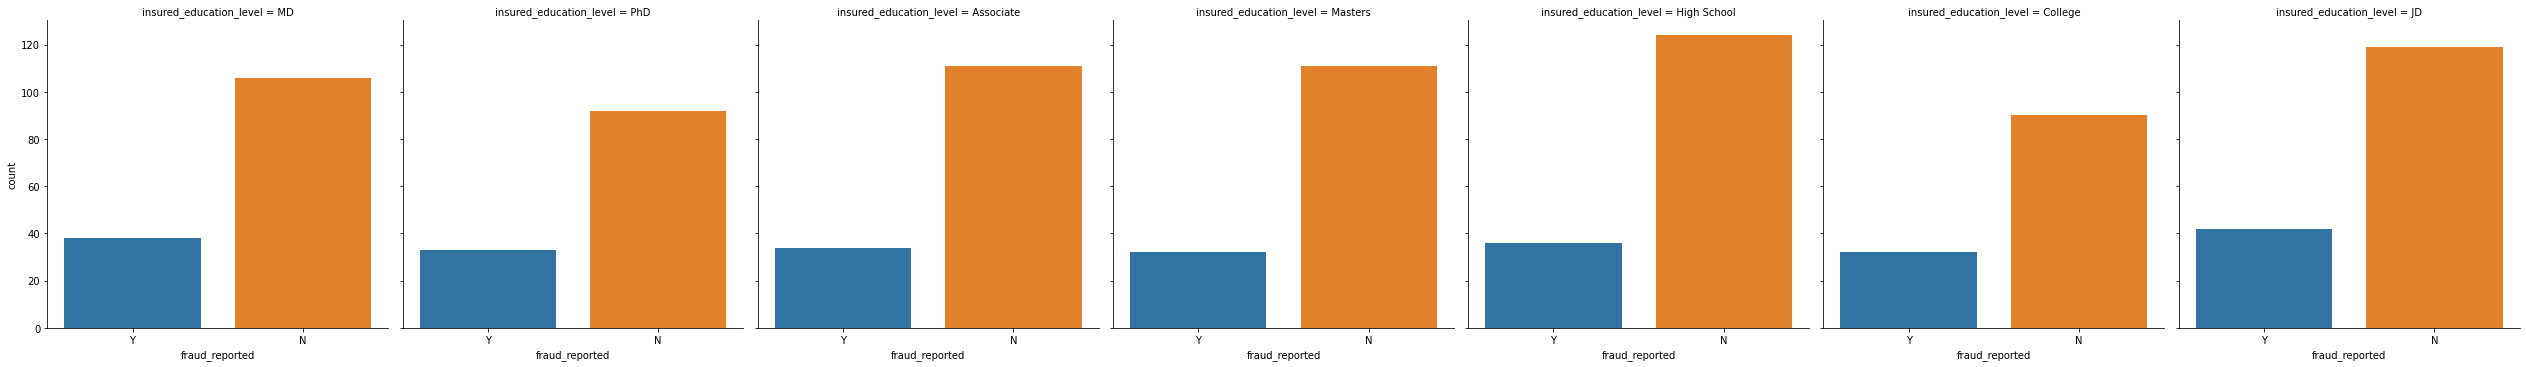

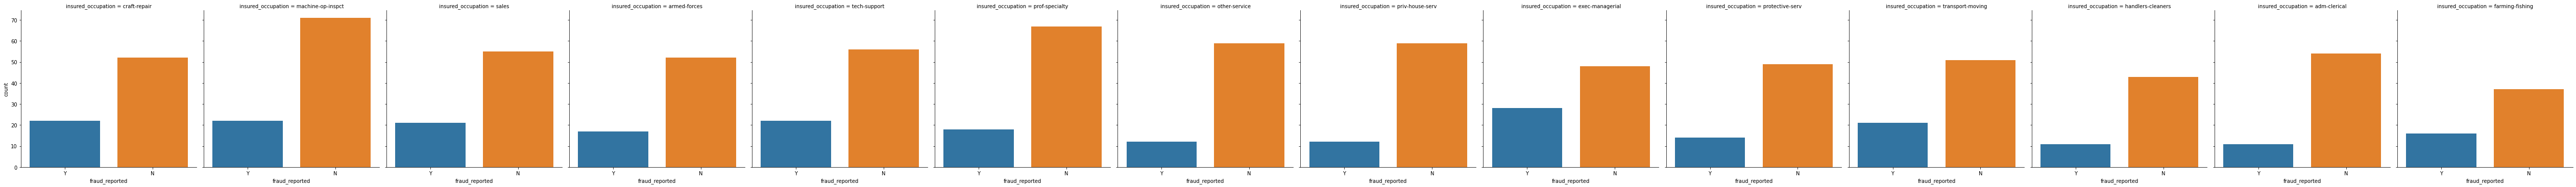

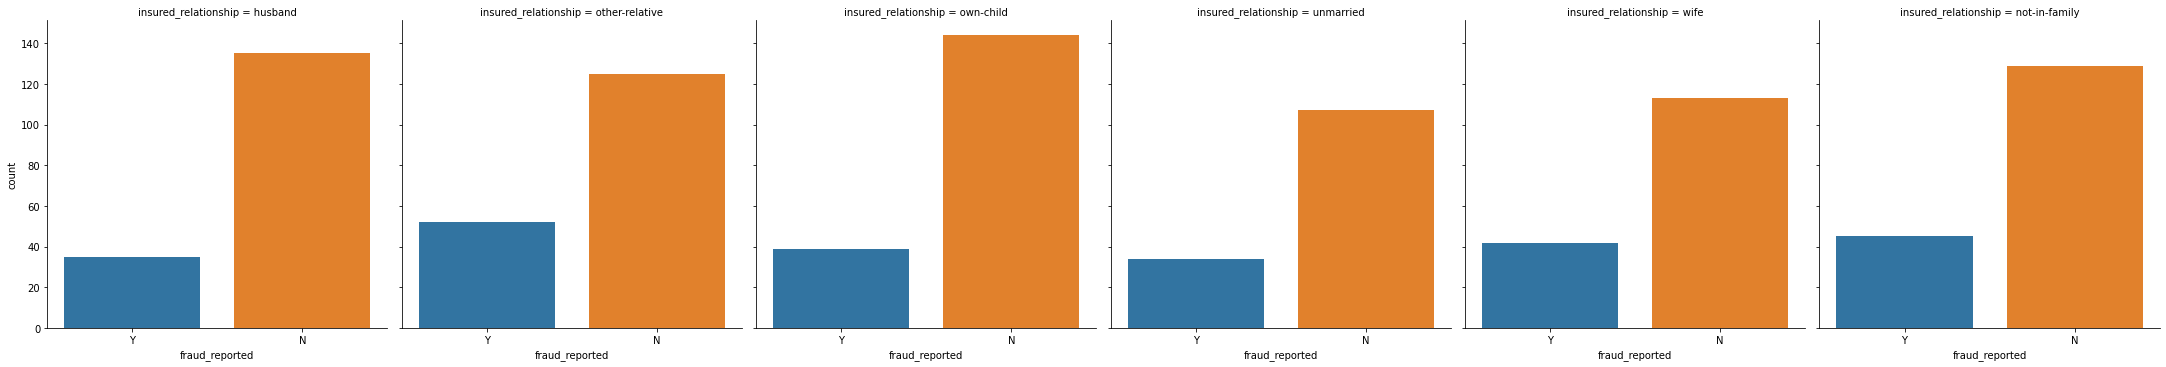

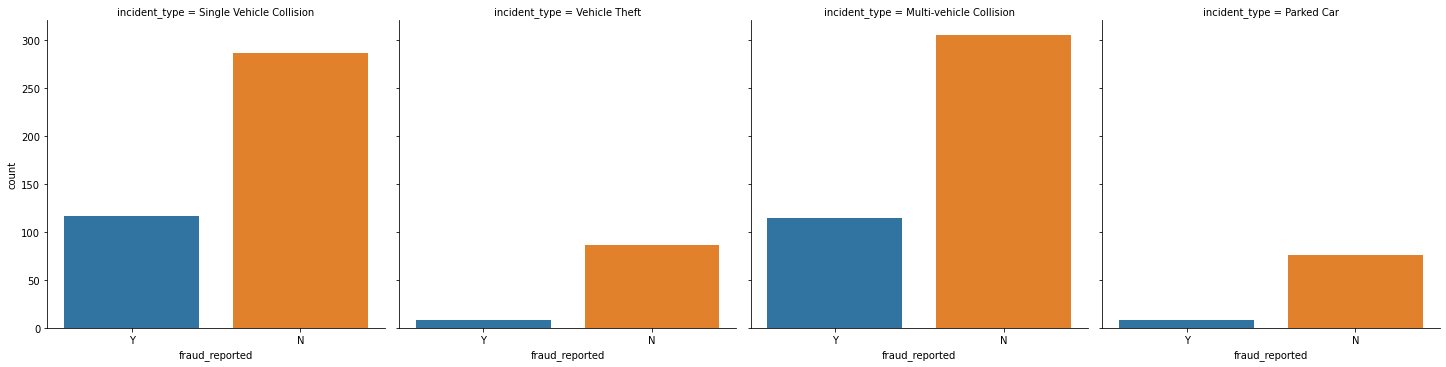

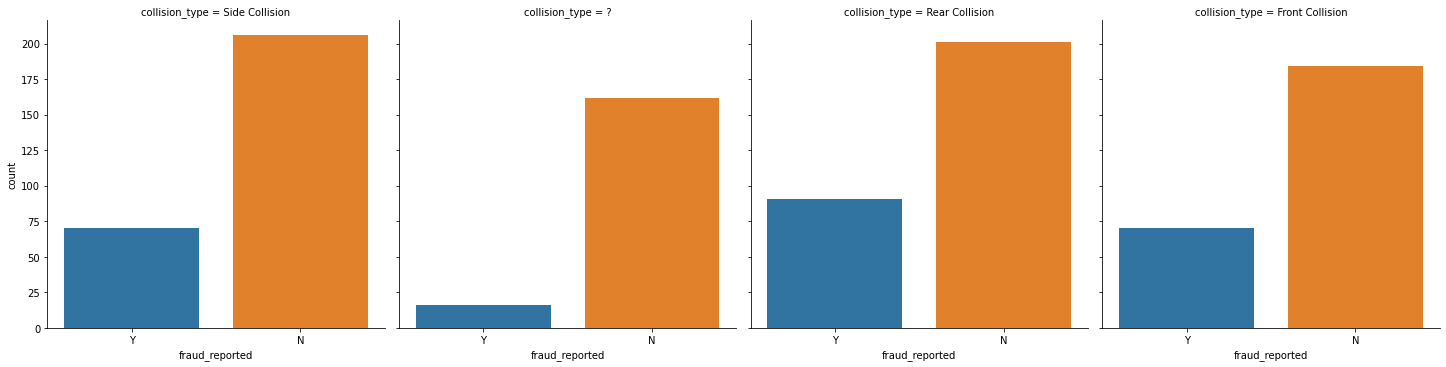

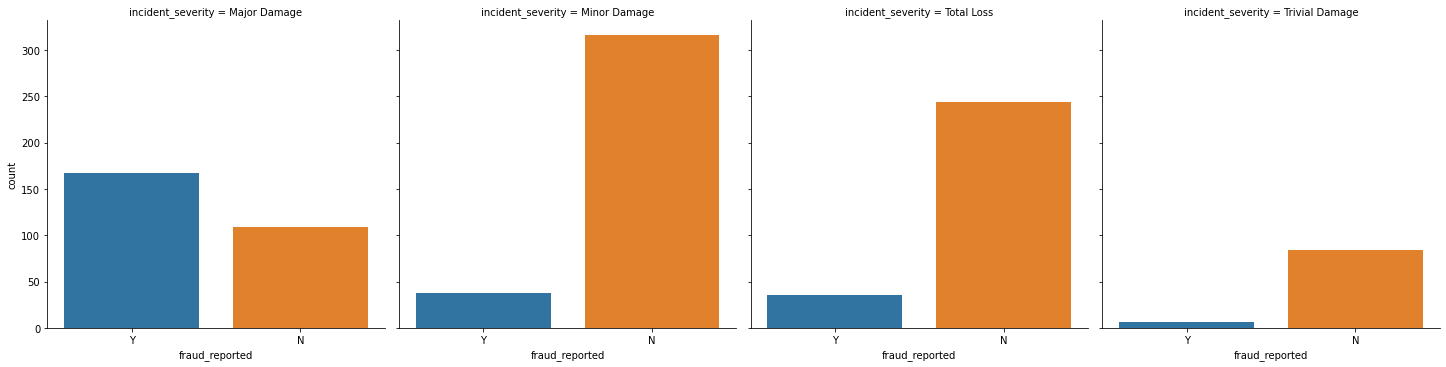

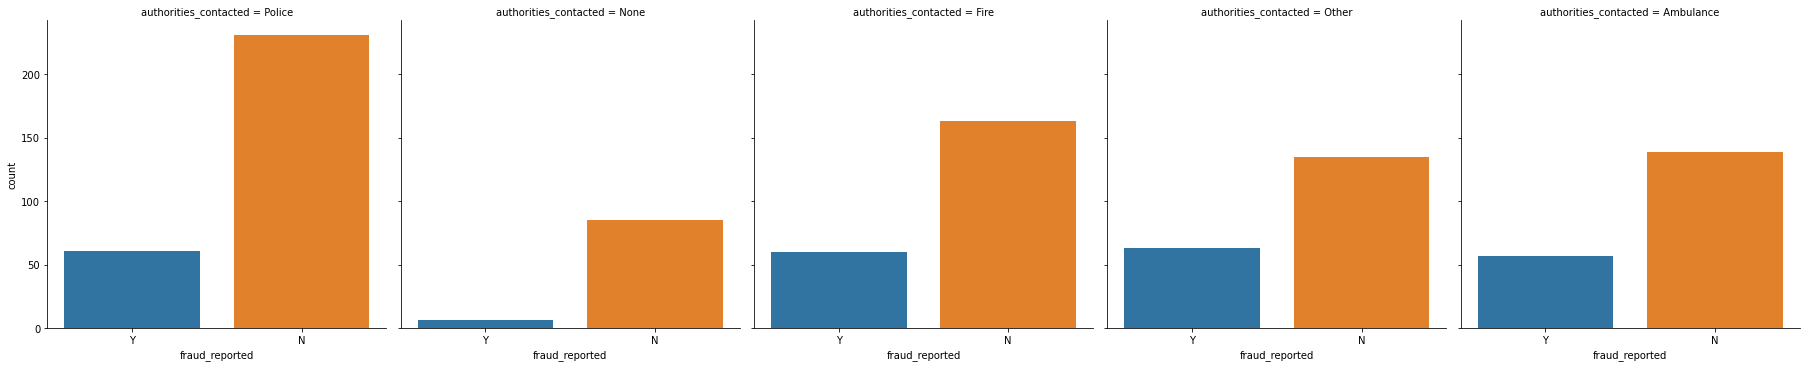

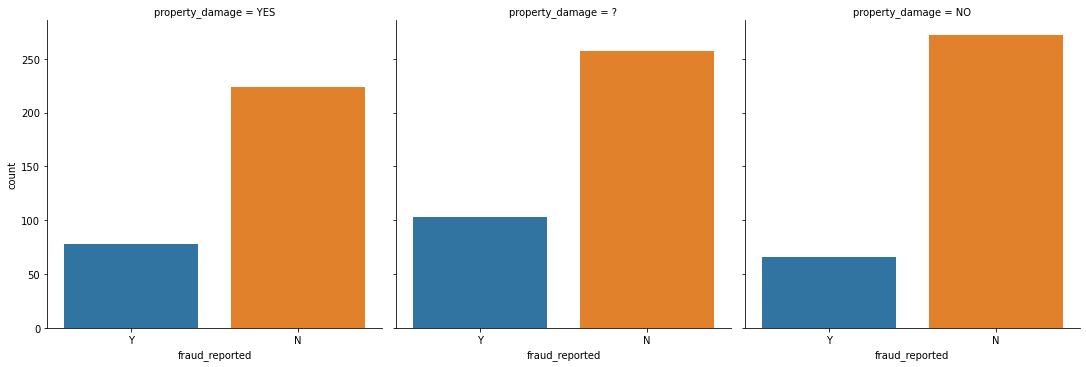

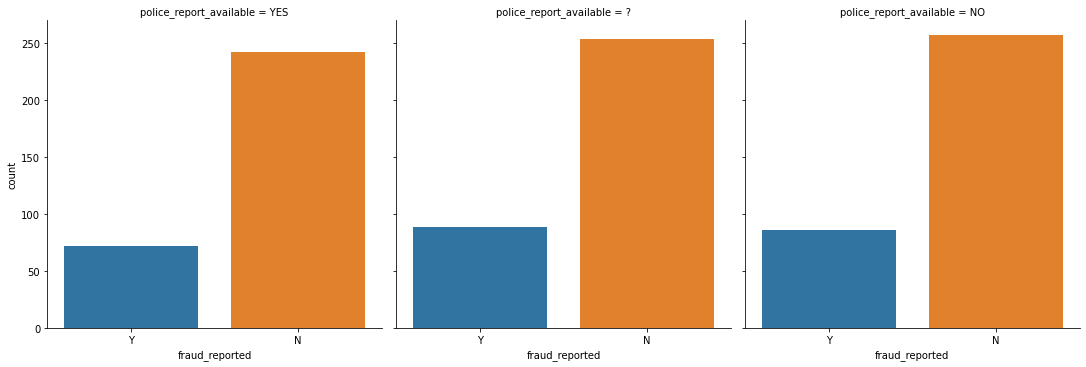

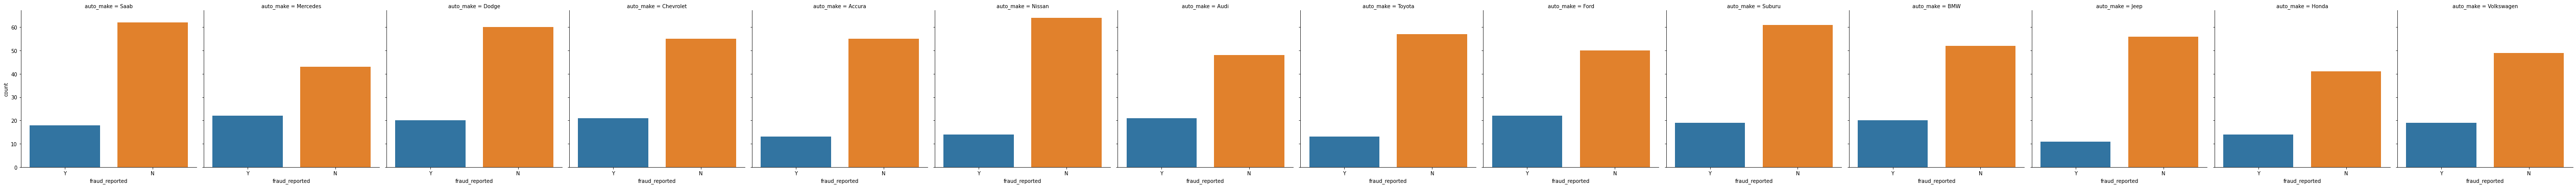

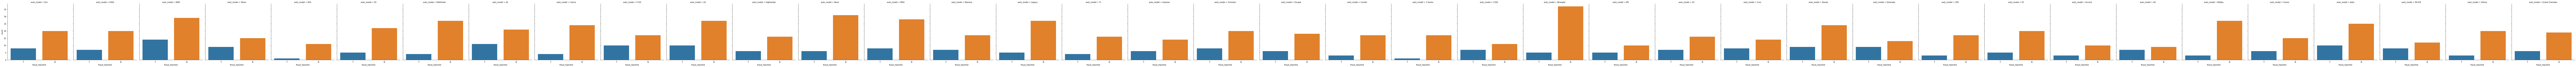

In [119]:
#check target label split over categorical features
#Find out the relationship between categorical variable and dependent variable
for categorical_predictor in categorical_predictors:
    sns.catplot(x='fraud_reported', col=categorical_predictor, kind='count', data= df)
plt.show()

### Exploring numerical features

In [120]:
numerical_features = [feature for feature in data.columns if (data[feature].dtypes=='int64' or data[feature].dtypes=='float64')]
numerical_features

['months_as_customer',
 'age',
 'policy_number',
 'policy_deductable',
 'policy_annual_premium',
 'insured_zip',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year']

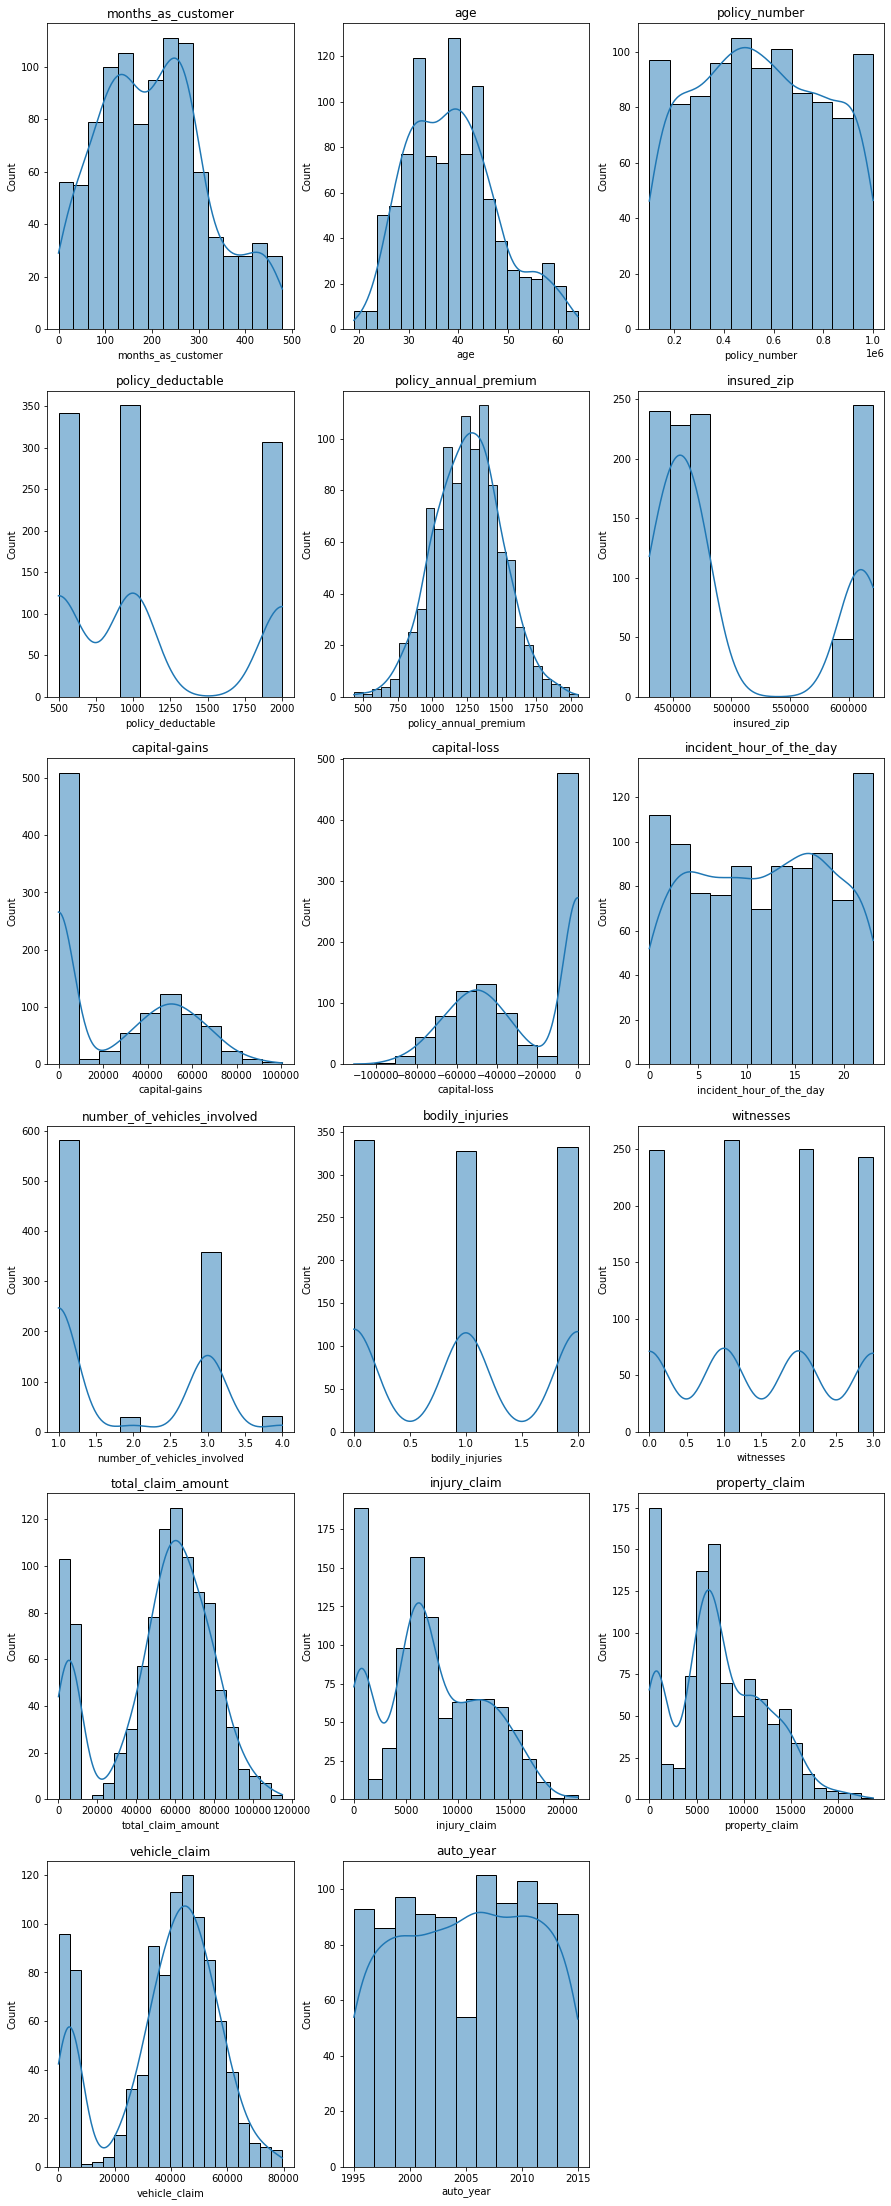

In [121]:
plt.figure(figsize=(15,80))
plotnumber = 1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.histplot(x = numerical_feature,data = df,kde=True)
    plt.title(numerical_feature)
    plotnumber+=1
plt.show()

### Finding outliers in numerical features

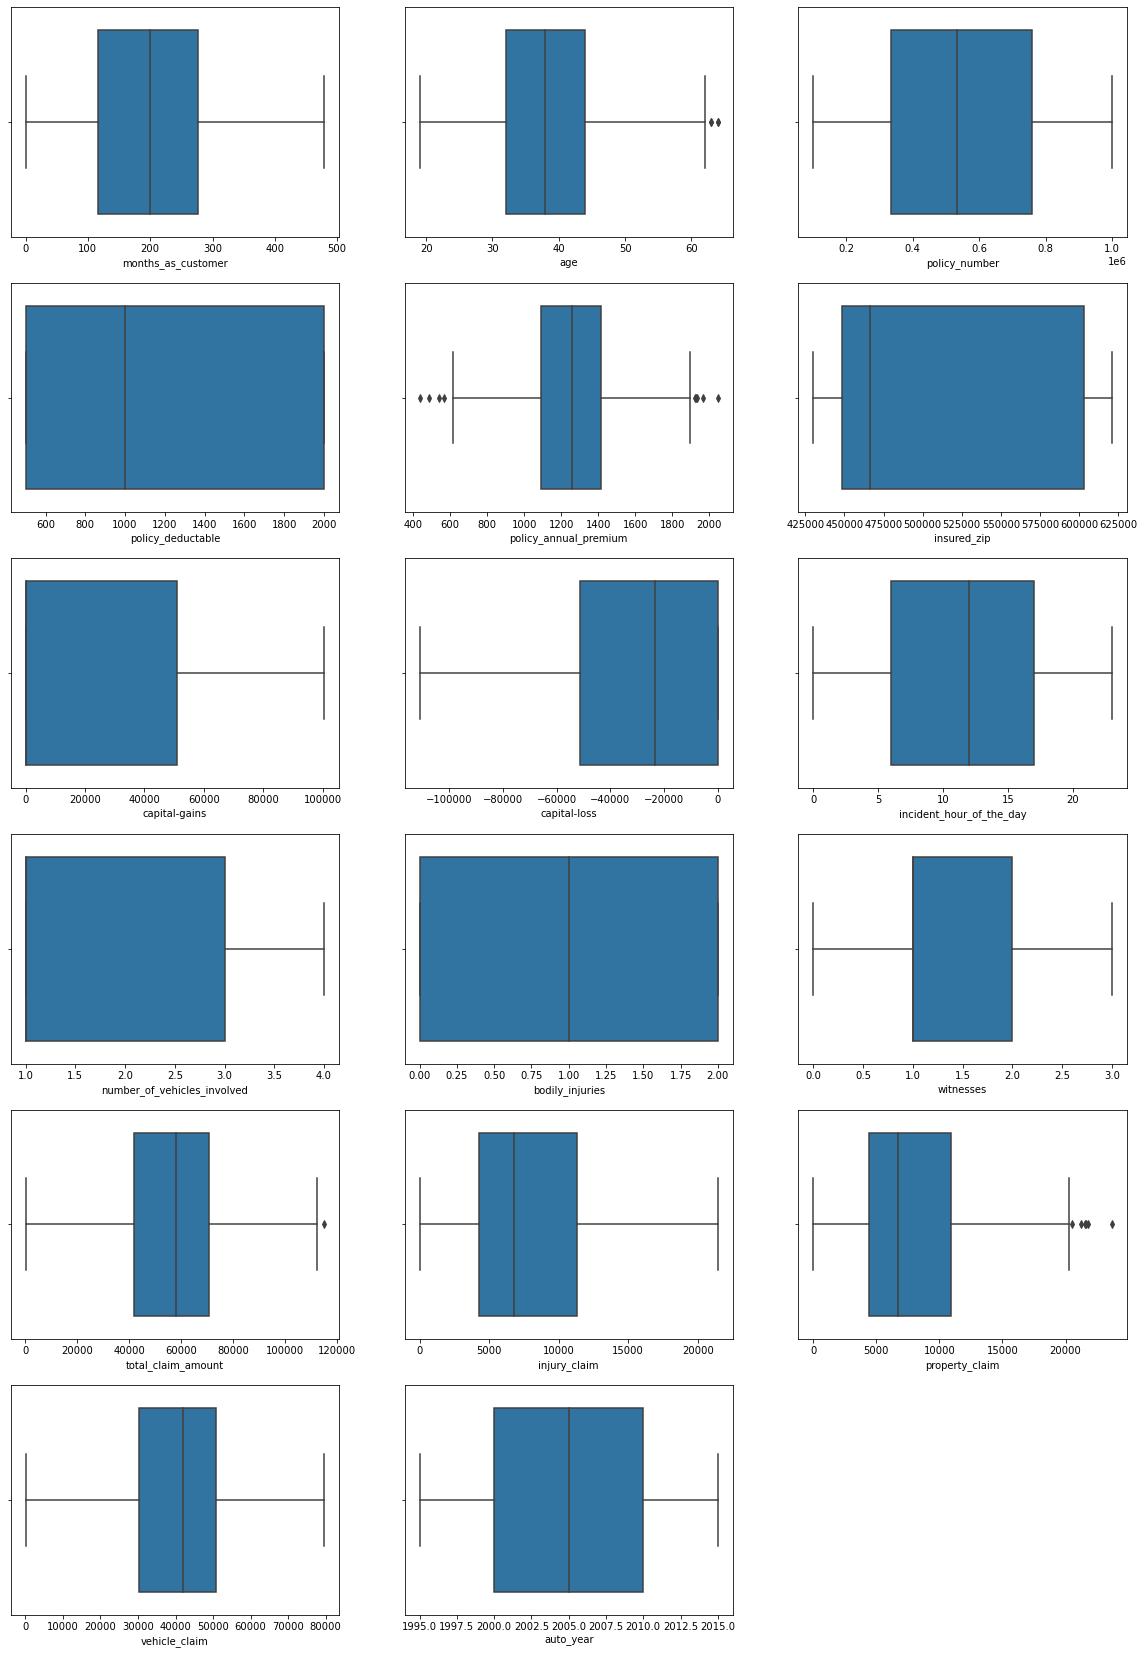

In [122]:
#boxplot on numerical features to find outliers
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x = df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

From the above plots it can be seen that property_claim, policy_annual_premium, and age has some outliers.

### Correlation between numerical features

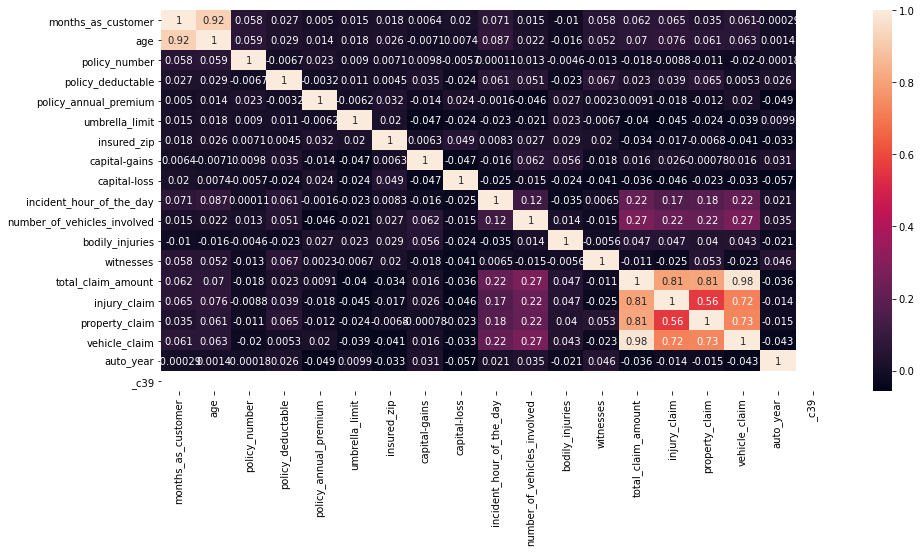

In [123]:
## Checking for correlation
cor_mat=df.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

Here we can see that there is some correlation between age and months as customer apart from that there is no major correlation between features

In [120]:
categorical_data = data.select_dtypes("object")
categorical_data.head()

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available,auto_make,auto_model
0,250/500,MALE,MD,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES,Saab,92x
1,250/500,MALE,MD,machine-op-inspct,other-relative,Vehicle Theft,Unknown,Minor Damage,Police,Unknown,Unknown,Mercedes,E400
2,100/300,FEMALE,PhD,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO,Dodge,RAM
3,250/500,FEMALE,PhD,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,Unknown,NO,Chevrolet,Tahoe
4,500/1000,MALE,Associate,sales,unmarried,Vehicle Theft,Unknown,Minor Damage,None,NO,NO,Accura,RSX


Converting categorical data into numerical data using label encoder and normalising numerical data using standard scalar

In [103]:
categorical_predictors = categorical_data.columns
data = data.drop(categorical_predictors, axis=1)
num_data = data

In [104]:
ss = StandardScaler()

data = ss.fit_transform(data)

data = pd.DataFrame(data,columns = num_data.columns)

In [105]:
le = LabelEncoder()

for i in categorical_data.columns:
    categorical_data[i] = le.fit_transform(categorical_data[i])

categorical_data.head()

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available,auto_make,auto_model
0,1,1,4,2,0,2,2,0,4,2,2,10,1
1,1,1,4,6,2,3,3,1,4,1,1,8,12
2,0,0,6,11,3,0,1,1,4,0,0,4,30
3,1,0,6,1,4,2,0,0,4,1,0,3,34
4,2,1,0,11,4,3,3,1,2,0,0,0,31


In [106]:
data = data.join(categorical_data)
data.head()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,...,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available,auto_make,auto_model
0,1.078140,0.990836,-0.095953,-0.222383,0.616705,-0.489529,1.011331,0.953851,-0.956261,-0.823865,...,2,0,2,2,0,4,2,2,10,1
1,0.208995,0.334073,-0.791527,1.412784,-0.242521,-0.461008,-0.901927,0.953851,-0.524475,-0.823865,...,6,2,3,3,1,4,1,1,8,12
2,-0.608002,-1.088913,0.550566,1.412784,0.642233,-0.984885,0.358023,0.953851,-0.668404,1.140056,...,11,3,0,1,1,4,0,0,4,30
3,0.452355,0.224613,-1.239334,1.412784,0.652886,1.491682,0.853388,-1.267577,-0.956261,-0.823865,...,1,4,2,0,0,4,1,0,3,34
4,0.208995,0.552994,-0.695834,-0.222383,1.341980,1.527808,1.467210,-0.683741,1.202666,-0.823865,...,11,4,3,3,1,2,0,0,0,31


In [86]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'policy_annual_premium', 'insured_zip', 'capital-gains', 'capital-loss',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_year', 'policy_csl',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_relationship', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'property_damage',
       'police_report_available', 'auto_make', 'auto_model'],
      dtype='object')

In [87]:
labels = df['fraud_reported']

In [88]:
labels = le.fit_transform(labels)

In [89]:
x_train,x_test,y_train,y_test = train_test_split(data,labels,test_size=0.3)

[]

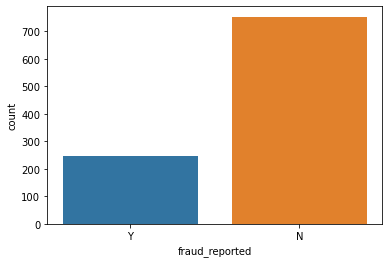

In [90]:
plt.figure()
sns.countplot(x ='fraud_reported',data=df)
plt.plot()

From the countplot of both the classes we can see that the dataset is highly imbalanced

In [91]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

sm = SMOTE(random_state = 2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)
  
print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 174
Before OverSampling, counts of label '0': 526 

After OverSampling, the shape of train_X: (1052, 30)
After OverSampling, the shape of train_y: (1052,) 

After OverSampling, counts of label '1': 526
After OverSampling, counts of label '0': 526


### Logistic regression

Results on training data:

Accuracy = 0.7956273764258555
Precision = 0.7961936939383735
Recall = 0.7956273764258555

Results on testing data:

Accuracy = 0.7866666666666666
Precision = 0.8178682345846525
Recall = 0.7866666666666666


f:\harry potter\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


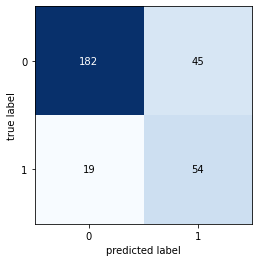

In [92]:
lr = LogisticRegression()
lr.fit(x_train_res,y_train_res)
predict = lr.predict(x_test)
pred_tr = lr.predict(x_train_res)
conf_matrix = confusion_matrix(y_test,predict)
plot_confusion_matrix(conf_matrix)

precision = precision_score(y_test,predict,average='weighted')
recall = recall_score(y_test, predict,average='weighted')

print("Results on training data:\n")
print("Accuracy = "+str(accuracy_score(y_train_res, pred_tr)))
print("Precision = "+str(precision_score(y_train_res,pred_tr,average='weighted')))
print("Recall = "+str(recall_score(y_train_res,pred_tr,average='weighted')))

print()

print("Results on testing data:\n")
print("Accuracy = "+str(accuracy_score(y_test, predict)))
print("Precision = "+str(precision))
print("Recall = "+str(recall))
        

### Random forest classifier

Results on training data:

Accuracy = 1.0
Precision = 1.0
Recall = 1.0

Results on testing data:

Accuracy = 0.8266666666666667
Precision = 0.823645147123408
Recall = 0.8266666666666667


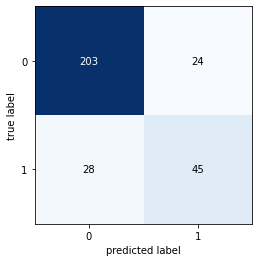

In [93]:
rfc = RandomForestClassifier()
rfc.fit(x_train_res,y_train_res)
pred_2 = rfc.predict(x_test)
pred_tr_2 = rfc.predict(x_train_res)
conf_matrix = confusion_matrix(y_test,pred_2)
plot_confusion_matrix(conf_matrix)

precision = precision_score(y_test,pred_2,average='weighted')
recall = recall_score(y_test, pred_2,average='weighted')

print("Results on training data:\n")
print("Accuracy = "+str(accuracy_score(y_train_res, pred_tr_2)))
print("Precision = "+str(precision_score(y_train_res,pred_tr_2,average='weighted')))
print("Recall = "+str(recall_score(y_train_res,pred_tr_2,average='weighted')))

print()

print("Results on testing data:\n")
print("Accuracy = "+str(accuracy_score(y_test, pred_2)))
print("Precision = "+str(precision))
print("Recall = "+str(recall))
        

### Support vector machine

Results on training data:

Accuracy = 0.8079847908745247
Precision = 0.8123240675580577
Recall = 0.8079847908745247

Results on testing data:

Accuracy = 0.7166666666666667
Precision = 0.7600601779173208
Recall = 0.7166666666666667


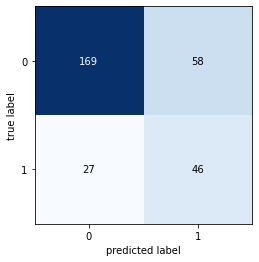

In [94]:
SVM = svm.SVC()
SVM.fit(x_train_res,y_train_res)
pred_3 = SVM.predict(x_test)
pred_tr_3 = SVM.predict(x_train_res)
conf_matrix = confusion_matrix(y_test,pred_3)
plot_confusion_matrix(conf_matrix)

precision = precision_score(y_test,pred_3,average='weighted')
recall = recall_score(y_test, pred_3,average='weighted')

print("Results on training data:\n")
print("Accuracy = "+str(accuracy_score(y_train_res, pred_tr_3)))
print("Precision = "+str(precision_score(y_train_res,pred_tr_3,average='weighted')))
print("Recall = "+str(recall_score(y_train_res,pred_tr_3,average='weighted')))

print()

print("Results on testing data:\n")
print("Accuracy = "+str(accuracy_score(y_test, pred_3)))
print("Precision = "+str(precision))
print("Recall = "+str(recall))


### Hyperparamater tuning in svm

In [95]:
degrees = [2,3,4,5,6,7,8]
kernels = ['poly', 'rbf', 'sigmoid']
c_value = [1,2,3]

In [96]:
scores = {}

for degree in degrees:
    for kernel in kernels:
        for c in c_value:
            svc_t = svm.SVC(kernel = kernel, degree = degree, C = c)
            svc_t.fit(x_train_res, y_train_res)
            
            preds = svc_t.predict(x_test)
            score = svc_t.score(x_test,y_test)
            #print('Score with degree as {d}, kernel as {k}, C as {c} is:'.format(d = degree, k = kernel, c = c), score)
            
            scores['Score with degree as {d}, kernel as {k}, C as {c} is best'.format(d = degree, k = kernel, c = c)] = score

print(max(scores, key=scores.get))

Score with degree as 2, kernel as rbf, C as 3 is best


Results on training data:

Accuracy = 0.8336501901140685
Precision = 0.8349686305957829
Recall = 0.8336501901140685

Results on testing data:

Accuracy = 0.7633333333333333
Precision = 0.7890935068512016
Recall = 0.7633333333333333


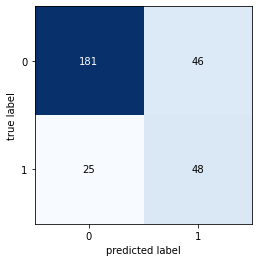

In [97]:
svc_tuned = svm.SVC(kernel='rbf', degree = 2, C = 3)
svc_tuned.fit(x_train_res, y_train_res)

preds_4 = svc_tuned.predict(x_train_res)
preds = svc_tuned.predict(x_test)

conf_matrix = confusion_matrix(y_test,preds)
plot_confusion_matrix(conf_matrix)

precision = precision_score(y_test,preds,average='weighted')
recall = recall_score(y_test, preds,average='weighted')

print("Results on training data:\n")
print("Accuracy = "+str(accuracy_score(y_train_res, preds_4)))
print("Precision = "+str(precision_score(y_train_res,preds_4,average='weighted')))
print("Recall = "+str(recall_score(y_train_res,preds_4,average='weighted')))

print()

print("Results on testing data:\n")
print("Accuracy = "+str(accuracy_score(y_test, preds)))
print("Precision = "+str(precision))
print("Recall = "+str(recall))


### Decision tree classifier

Results on training data:

Accuracy = 1.0
Precision = 1.0
Recall = 1.0

Results on testing data:

Accuracy = 0.78
Precision = 0.7779851159357895
Recall = 0.78


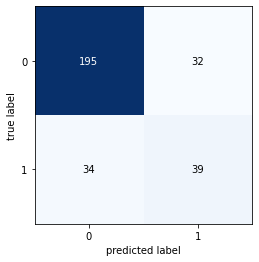

In [98]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train_res, y_train_res)
pred_5 = dtc.predict(x_test)

pred_tr_5 = dtc.predict(x_train_res)

conf_matrix = confusion_matrix(y_test,pred_5)
plot_confusion_matrix(conf_matrix)

precision = precision_score(y_test,pred_5,average='weighted')
recall = recall_score(y_test, pred_5,average='weighted')

print("Results on training data:\n")
print("Accuracy = "+str(accuracy_score(y_train_res, pred_tr_5)))
print("Precision = "+str(precision_score(y_train_res,pred_tr_5,average='weighted')))
print("Recall = "+str(recall_score(y_train_res,pred_tr_5,average='weighted')))

print()

print("Results on testing data:\n")
print("Accuracy = "+str(accuracy_score(y_test, pred_5)))
print("Precision = "+str(precision))
print("Recall = "+str(recall))


### XGBoost classifier

f:\harry potter\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:26:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Results on training data:

Accuracy = 1.0
Precision = 1.0
Recall = 1.0

Results on testing data:

Accuracy = 0.8266666666666667
Precision = 0.8222902654111418
Recall = 0.8266666666666667


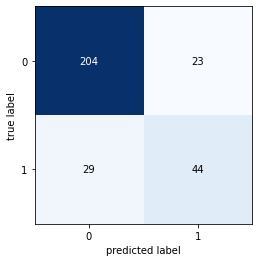

In [100]:
xgb = XGBClassifier()
xgb.fit(x_train_res, y_train_res)

pred_tr_7 = xgb.predict(x_train_res)
pred_7 = xgb.predict(x_test)
conf_matrix = confusion_matrix(y_test,pred_7)
plot_confusion_matrix(conf_matrix)

precision = precision_score(y_test,pred_7,average='weighted')
recall = recall_score(y_test, pred_7,average='weighted')

print("Results on training data:\n")
print("Accuracy = "+str(accuracy_score(y_train_res, pred_tr_7)))
print("Precision = "+str(precision_score(y_train_res,pred_tr_7,average='weighted')))
print("Recall = "+str(recall_score(y_train_res,pred_tr_7,average='weighted')))

print()

print("Results on testing data:\n")
print("Accuracy = "+str(accuracy_score(y_test, pred_7)))
print("Precision = "+str(precision))
print("Recall = "+str(recall))

### CatBoost classifier

In [101]:
cat = CatBoostClassifier(iterations=200, eval_metric = "AUC")
cat.fit(x_train_res, y_train_res)

Learning rate set to 0.046056
0:	total: 232ms	remaining: 46.1s
1:	total: 252ms	remaining: 24.9s
2:	total: 267ms	remaining: 17.5s
3:	total: 274ms	remaining: 13.4s
4:	total: 281ms	remaining: 10.9s
5:	total: 287ms	remaining: 9.29s
6:	total: 295ms	remaining: 8.13s
7:	total: 301ms	remaining: 7.22s
8:	total: 307ms	remaining: 6.53s
9:	total: 315ms	remaining: 5.99s
10:	total: 322ms	remaining: 5.53s
11:	total: 328ms	remaining: 5.14s
12:	total: 334ms	remaining: 4.81s
13:	total: 342ms	remaining: 4.55s
14:	total: 352ms	remaining: 4.34s
15:	total: 360ms	remaining: 4.14s
16:	total: 366ms	remaining: 3.94s
17:	total: 376ms	remaining: 3.81s
18:	total: 387ms	remaining: 3.69s
19:	total: 399ms	remaining: 3.59s
20:	total: 412ms	remaining: 3.51s
21:	total: 424ms	remaining: 3.43s
22:	total: 433ms	remaining: 3.33s
23:	total: 443ms	remaining: 3.25s
24:	total: 450ms	remaining: 3.15s
25:	total: 461ms	remaining: 3.08s
26:	total: 470ms	remaining: 3.01s
27:	total: 479ms	remaining: 2.94s
28:	total: 488ms	remaining: 

Results on training data:

Accuracy = 1.0
Precision = 1.0
Recall = 1.0

Results on testing data:

Accuracy = 0.8433333333333334
Precision = 0.8440751813760663
Recall = 0.8433333333333334


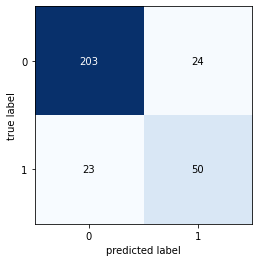

In [102]:
pred_tr_8 = cat.predict(x_train_res)
pred_8 = cat.predict(x_test)
conf_matrix = confusion_matrix(y_test,pred_8)
plot_confusion_matrix(conf_matrix)

precision = precision_score(y_test,pred_8,average='weighted')
recall = recall_score(y_test, pred_8,average='weighted')

print("Results on training data:\n")
print("Accuracy = "+str(accuracy_score(y_train_res, pred_tr_8)))
print("Precision = "+str(precision_score(y_train_res,pred_tr_8,average='weighted')))
print("Recall = "+str(recall_score(y_train_res,pred_tr_8,average='weighted')))

print()

print("Results on testing data:\n")
print("Accuracy = "+str(accuracy_score(y_test, pred_8)))
print("Precision = "+str(precision))
print("Recall = "+str(recall))

#### Out of all the classifiers, 'CatBoost classifier' gives best results with 100% accuracy on training data and 84% accuracy on test data